<h2>Import packages and data</h2>

In [1]:
from scipy.io import netcdf
import similarity_measures as sim
import calculations as calc
import matplotlib as plt
import comparing as comp
import combining as comb
import plots
import numpy as np

In [2]:
plt.rcParams.update({'font.size': 30})

In [3]:
nc_l3 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l3-u.nc")

In [4]:
nc_l30 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l30-u.nc")

In [5]:
nc_l70 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l70-u.nc")

In [6]:
nc_l300 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l300-u.nc")

<h2>Derive QBO and prepare datasets</h2>

In [7]:
lon = calc.convert_coordinates_to_grid(nc_l30.variables["longitude"][:], 180)
lat = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0)

lon_step = 256 #Around the whole equator
lat_step = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0) - calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 5)


u_l30 = nc_l30.variables["u"]

#Deseasonalize
u_l30 = calc.deseasonalize_map(u_l30)

qbo_equator = calc.derive(u_l30[:, :, :, :], lat, lon, 0, lat_step, lon_step)

In [8]:
u_l70 = nc_l70.variables["u"]
u_l70 = calc.deseasonalize_map(u_l70)

In [9]:
u_l3 = nc_l3.variables["u"]
u_l3 = calc.deseasonalize_map(u_l3)

In [10]:
u_l300 = nc_l300.variables["u"]
u_l300 = calc.deseasonalize_map(u_l300)

<h1>Dependencies to different datasets (containing different levels)</h1>

In [11]:
print(plots.plot_similarities_to_different_datasets.__doc__)


    Plot the similarities for different similarity measures between a reference series and different datasets.

    The results are made comparable using the scaling_func. The results of Pearson's Correlation stay unscaled.


    Args:
        datasets (list): List with datasets to compute the similarity to
        dataset_labels (list): List of labels for the datasets
        reference_series (numpy.ndarray): 1 dimensional reference series
        measures (list): List of similarity measures to compute similarity between two time series
        measure_labels (list): List of labels for the measures
        scaling_func (function, optional): Function that takes a map of similarity values and scales them in order
                                           to make the similarity values of different similarity measures comparable
            Defaults to comp.binning_values_to_quantiles
        level (int, optional): Level on which the similarity should be calculated
            Defaults 

In [12]:
measures = [sim.pearson_correlation, sim.mutual_information, comp.invert(sim.manhattan_distance)]

In [13]:
measure_labels = ["Pearson's Correlation", "Mutual Information", "Manhattan Distance (Inverted)"]

In [14]:
datasets = [u_l3, u_l30, u_l70, u_l300]

In [15]:
dataset_labels = ["3hPa", "30 hPa", "70 hPa", "300hPa"]

C:\Users\tousp\OneDrive\KIT\6. Semester\Bachelorarbeit\Climate-Similarity-Metrics\plots.py:675: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='mill', lon_0=30, resolution='l', ax=axis)


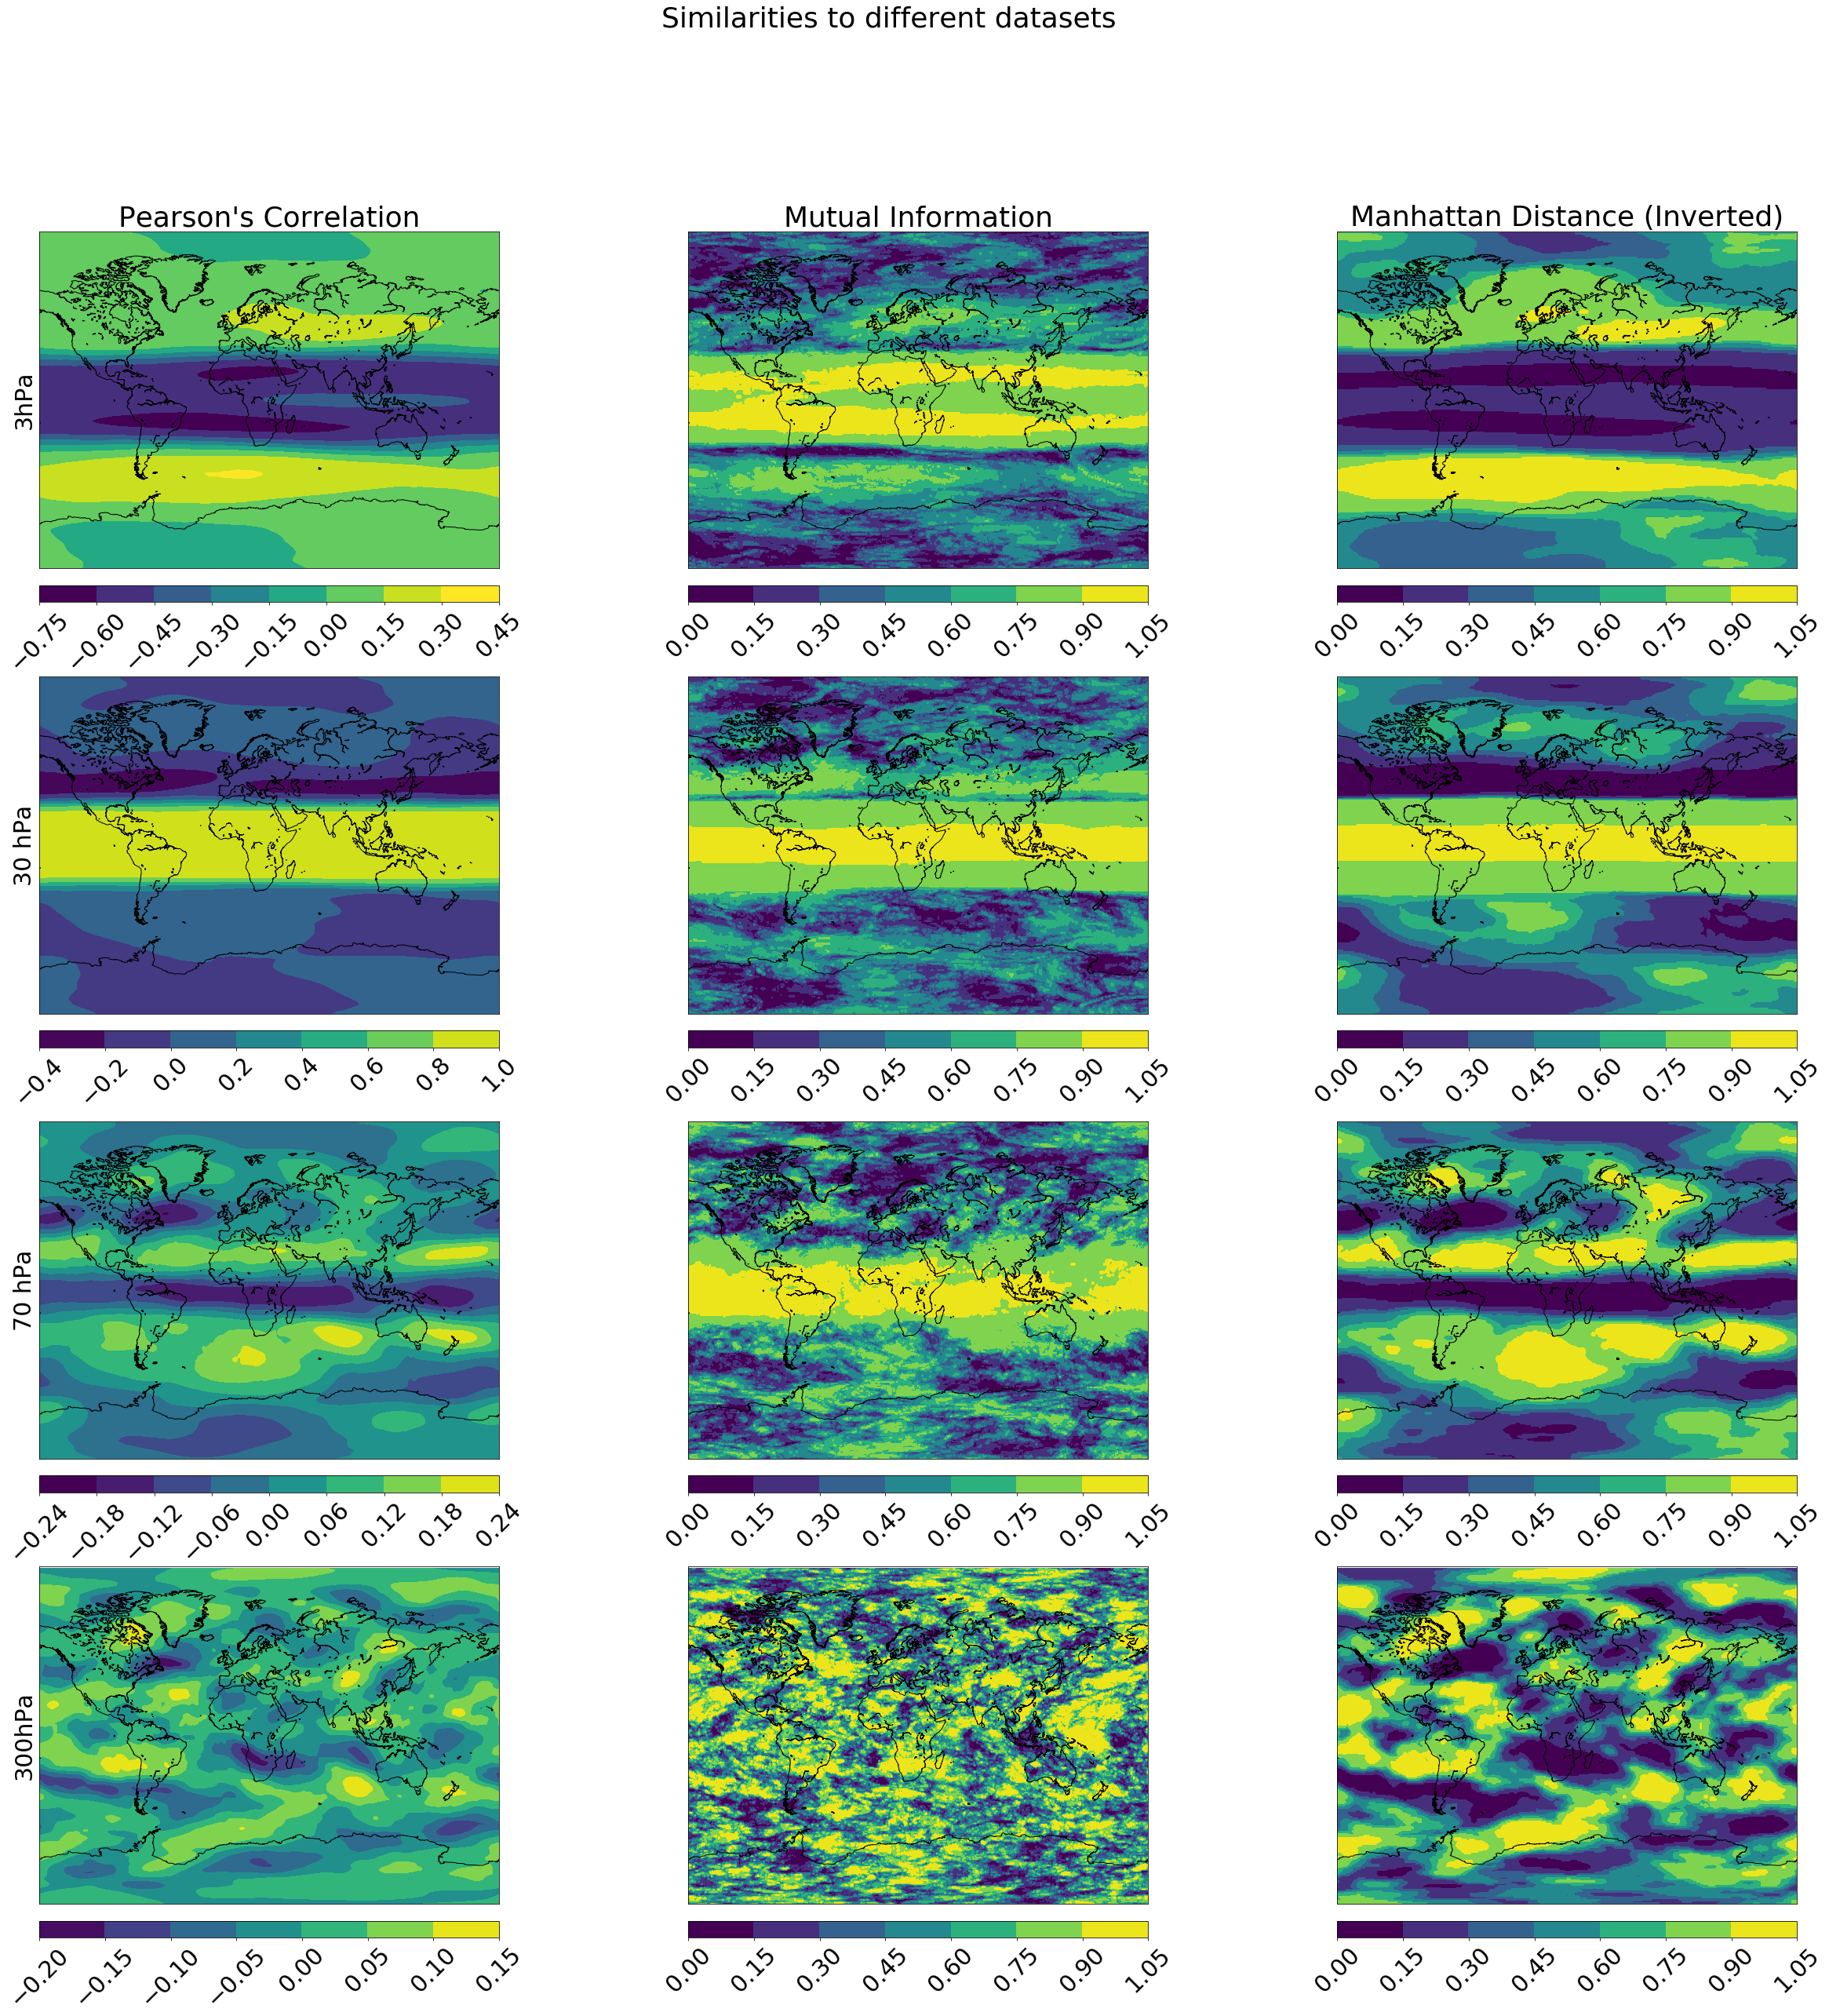

In [16]:
plots.plot_similarities_to_different_datasets(datasets, dataset_labels, qbo_equator, measures, measure_labels)